## 糖尿病病數據集


* 匯入套件

#### Tools
    *Analysis
        Numpy
        Pandas
    *Visualization
        Matplotlib
        Seaborn
        Plotly

In [169]:
import pandas as pd # 載入pandas 套件 命名引用名稱:pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* 讀取資料檔案

In [170]:
rowdata = pd.read_csv('./diabetes.csv')  # 讀入csv檔，並把資料命名為 'rowdata'
rowdata.head(10) # show出前10筆資料

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


* 查看資料型態

In [171]:
rowdata.dtypes #查看資料集內的特徵資料型態

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* 查看資料筆數

In [172]:
# 確認Outcome分組數量
Count = rowdata.groupby(["Outcome"], as_index=False)["Outcome"].agg({"diabetes": "count"})
print(Count)


   Outcome  diabetes
0        0       500
1        1       268


In [173]:
# 另一種方法: 使用```pandas```套件觀察['Outcome']欄位分布
rowdata['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Outcome')

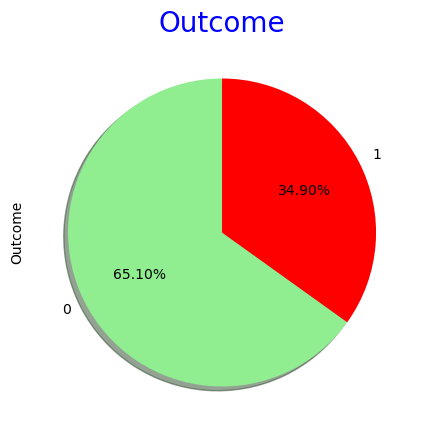

In [174]:
# 畫圖
colors = ["lightgreen", "red"]
rowdata["Outcome"].value_counts().plot(
    kind="pie", #圖形類別: 圓餅圖
    shadow=True, #圓餅圖要不要有陰影
    startangle=90,#設定圓餅圖角度
    figsize=(5, 5),#設定圖形的大小
    autopct="%1.2f%%",
    colors=colors,
)
plt.title("Outcome", fontsize=20, color="blue")

* 檢查數值特徵分佈

In [175]:
#紀錄資料型態不是object的數量
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object'] 

C:\Users\user\AppData\Local\Temp\ipykernel_20528\807237631.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_20528\807237631.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_20528\807237631.py:7: UserWarning:



`distplot` is a dep

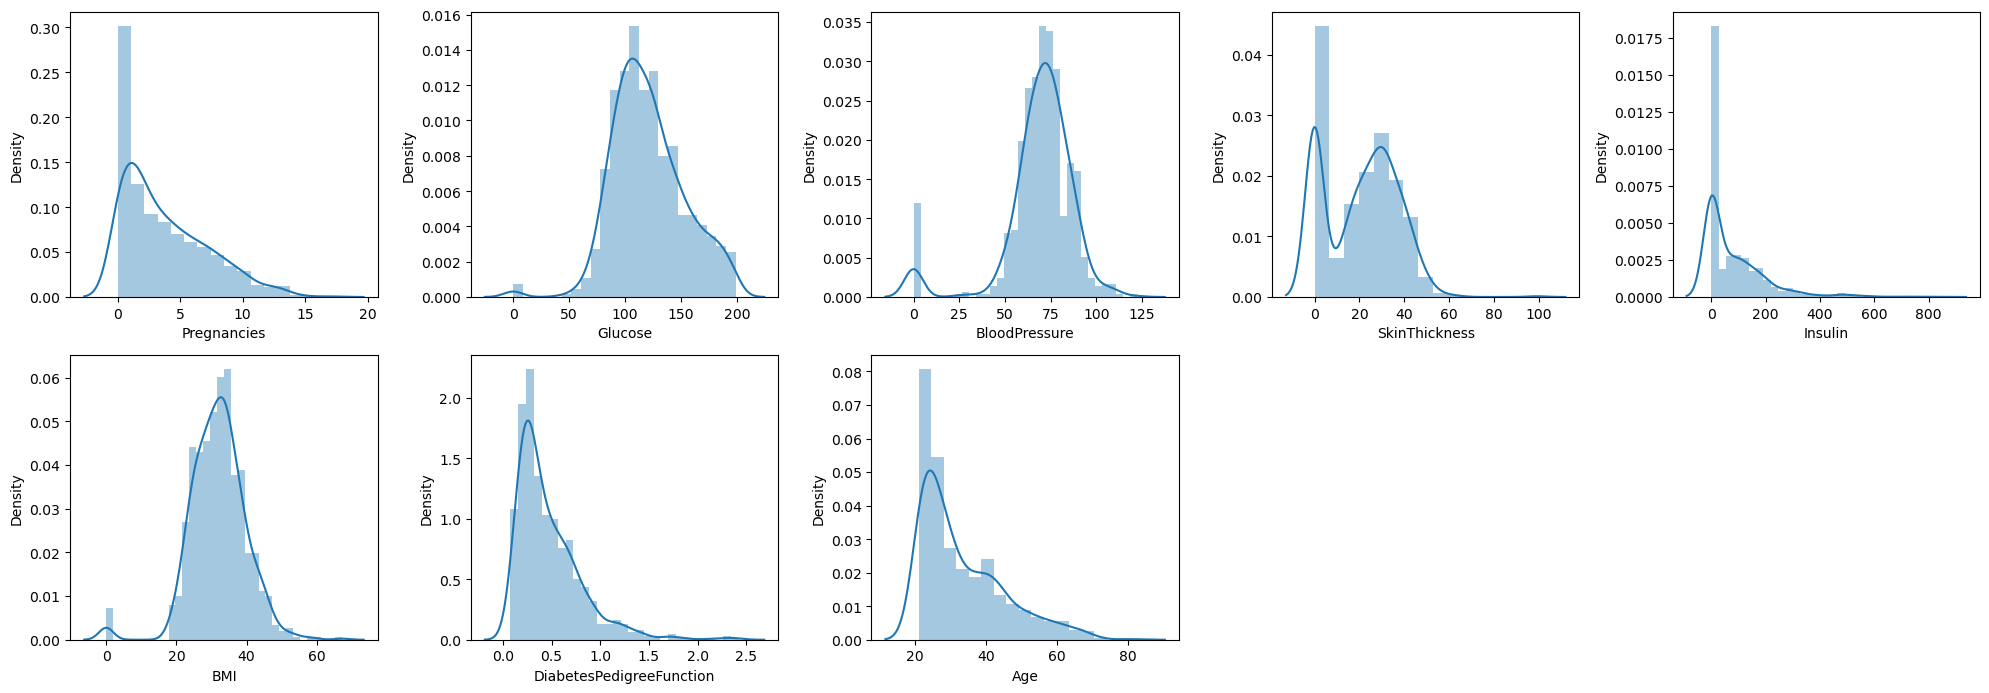

In [176]:
plt.figure(figsize = (20,10))
plot_number = 1

for column in num_cols:
    if plot_number <= 8:
        ax = plt.subplot(3, 5, plot_number)
        sns.distplot(rowdata[column])
        plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

#### 資料探索
* 繪製提琴圖(violin)，觀察'胰島素'與'是否有糖尿病'高低關係
* 繪製分布估計圖(kde)，觀察'葡萄糖'與'是否有糖尿病'高低關係
* 繪製散佈圖(scatter)，觀察'胰島素'與'葡萄糖'高低關係



In [177]:
# 定義畫圖的function

def violin(col):
    fig = px.violin(rowdata, y=col, x="Outcome", color="Outcome", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(rowdata, hue="Outcome", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(rowdata, x=col1, y=col2, color="Outcome")
    return fig.show()

In [178]:
violin('Glucose')
violin('Insulin')

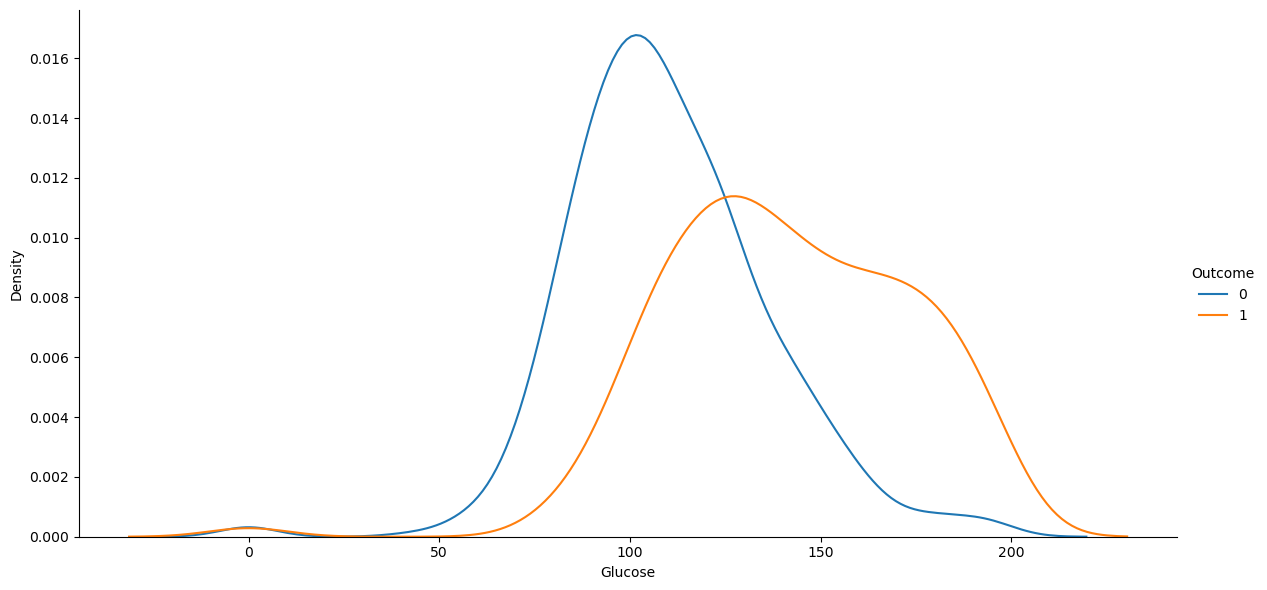

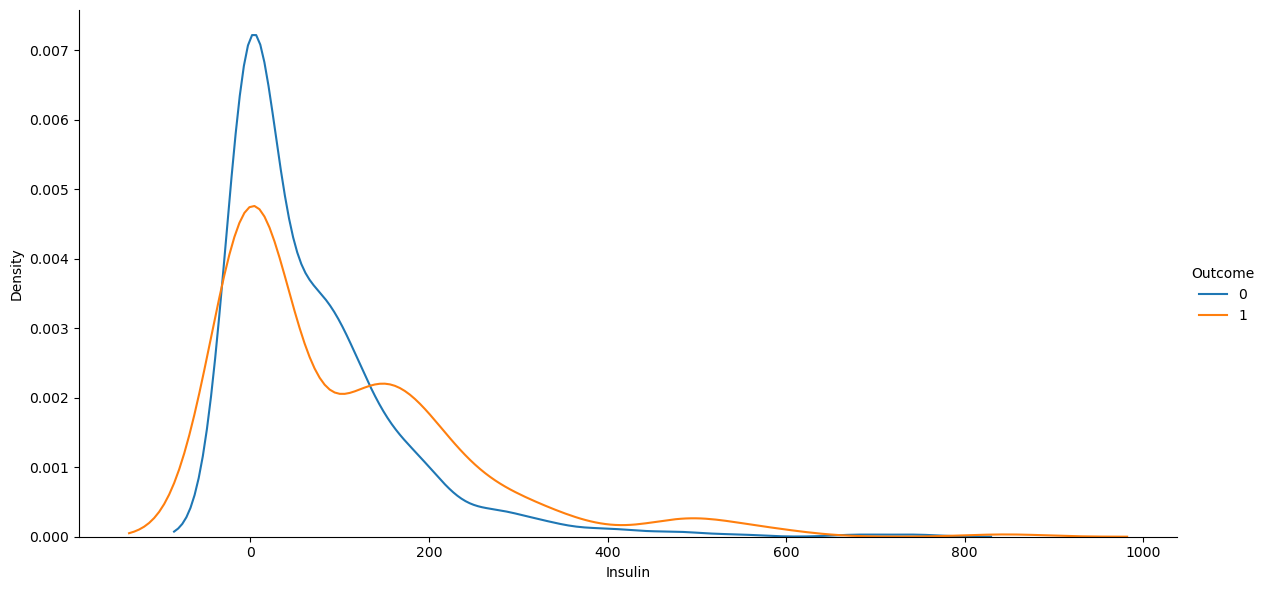

In [179]:
kde('Glucose')
kde('Insulin')

- 觀察葡萄糖與糖尿病的分布估計圖，可以發現有糖尿病的患者有較多葡萄糖的一個現象
- 而胰島素與糖尿病的分布估計圖，可以發現不管是否有糖尿病都集中在0的附近

In [180]:
scatter('Insulin', 'Glucose')

觀察散布圖看到葡萄萄和胰島素的分布是正相關的

* 特徵工程

In [181]:
#檢查缺失值數量
normal_data.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

沒有缺失的資料

In [182]:
data_one_hot = pd.get_dummies(data) # 將One-hot-encoding處理的dataframe資料命名為 data_one_hot
data_one_hot.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [183]:
# 將移除Outcome(預測目標)的剩餘欄位命名為 clear_data
clear_data = data_one_hot.drop(['Outcome'],axis=1)

# 將Outcome(預測目標)欄位命名為 label
label = data_one_hot['Outcome']

In [184]:
clear_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## 模型開發
* 1.切分資料集
* 2.選擇模型
* 3.交叉驗證
* 4.計算偏差Bias和變異性Variance

In [185]:
x_features = clear_data
y_label = label
x_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


1.切分資料集

In [186]:
from sklearn.model_selection import KFold #使用k-fold

In [187]:
#定義K折交叉驗證
kf = KFold(n_splits=3, shuffle=True, random_state=42)  #sample random 成10分 random_state=42生成隨機種子

2.選擇模型

In [188]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  #選擇線性回歸

3.執行K-fold 交叉驗證

In [189]:
#執行K-fold交叉驗證
test_bias = []
test_variance = []
train_errors = []
test_errors = []

for train_index, test_index in kf.split(x_features):
    #拆分數據集為訓練集和測試集
    x_train, y_train = x_features.iloc[train_index], y_label[train_index]
    x_test, y_test = x_features.iloc[test_index], y_label[test_index]

    #訓練模型
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)   #預測訓練集資料
    y_test_pred = model.predict(x_test)   #預測測試集資料

    #計算偏差Bias和變異性Variance
    bias = np.mean((y_test_pred - np.mean(y_test))**2)
    variance = np.var(y_test_pred)

    test_bias.append(bias)
    test_variance.append(variance)

    #計算訓練和測試的誤差
    train_error = np.sum((y_train_pred - y_train)**2) / len(y_train_pred)
    test_error = np.sum((y_test_pred - y_test)**2) / len(y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

4.計算偏差Bias和變異性Variance

In [190]:
#輸出bias and variance
print("Bias:",test_bias)
print("Variance:",test_variance)

#輸出平均訓練和測試誤差
print("平均訓練誤差：",sum(train_errors)/len(train_errors))
print("平均測試誤差：",sum(test_errors)/len(test_errors))

Bias: [0.07839009847596182, 0.0822933531031151, 0.06023786041116885]
Variance: [0.07792731849774295, 0.08112164525822385, 0.06012912563646235]
平均訓練誤差： 0.15657923693283904
平均測試誤差： 0.16702325089487854


- K=10 平均訓練誤差： 0.1579790618275749 平均測試誤差： 0.16438171807660568
- K=5  平均訓練誤差： 0.1574822939059865 平均測試誤差： 0.16571918760189586
- K=3  平均訓練誤差： 0.1565792369328390 平均測試誤差： 0.16702325089487854